<a href="https://colab.research.google.com/github/smilingashutosh/qpp-eval-new/blob/main/duot5/matrix_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the  Res file

In [89]:
columns=['qid','Q0','docid','rank','score','comment']
res_df=pd.read_csv('https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/res_files/02bm25.1000.mt5.50/res.bm25.1000.monot5.50.mmnorm',names=columns,sep='\t')
res_df.head(5)

,qid,Q0,docid,rank,score,comment
0,19335,Q0,8412682,0,1.000000,pyterrier
1,19335,Q0,3045567,1,0.988172,pyterrier
2,19335,Q0,8412683,2,0.978426,pyterrier
3,19335,Q0,6452949,3,0.976848,pyterrier
4,19335,Q0,342431,4,0.960322,pyterrier


## Finding unique query ids and selecting one

In [90]:
qid_np = res_df['qid'].unique()
qid_np[1]

23849

In [91]:
res_df_qid = res_df[res_df['qid'] == qid_np[43]].sort_values(by='rank',ascending=True)
res_df_qid = res_df_qid.reset_index(drop=True)
res_df_qid.head(2)

,qid,Q0,docid,rank,score,comment
0,640502,Q0,6985038,0,1.00000,pyterrier
1,640502,Q0,598202,1,0.99072,pyterrier


## Importing the pairwise probability between Doc_i and Doc_J

In [92]:
paircols = ['qid','docpair','prob','comment']
pairwise_df=pd.read_csv('https://raw.githubusercontent.com/smilingashutosh/qpp-eval-new/main/res_files/02bm25.1000.mt5.50/duoT5.50.score.softmax.pairwise.doc.tsv',names=paircols,sep='\t')
pairwise_df.head(5)

,qid,docpair,prob,comment
0,1030303,8726436_8726433,0.892408,softmax
1,1030303,8726436_8726435,0.480476,softmax
2,1030303,8726436_8726429,0.955404,softmax
3,1030303,8726436_8726437,0.555172,softmax
4,1030303,8726436_7156982,0.868546,softmax


In [93]:
pairwise_df_qid = pairwise_df[pairwise_df['qid'] == qid_np[43]]
pairwise_df_lim= pairwise_df_qid[['docpair','prob']]
pairwise_dict=pairwise_df_lim.to_dict('records')
print(pairwise_dict[1])
print(type(pairwise_dict))
print(type(pairwise_dict[1]))
print(len(pairwise_dict))

{'docpair': '6730887_598202', 'prob': 0.7767563462}
<class 'list'>
<class 'dict'>
2450


In [94]:
docpair_np = np.array(pairwise_df_lim['docpair'])
prob_np = np.array(pairwise_df_lim['prob'])

dict_docpair_prob = dict(zip(docpair_np,prob_np))
print(len(dict_docpair_prob))
print(docpair_np[:2])
print(type(prob_np[:2]))

2450
['6730887_6985038' '6730887_598202']
<class 'numpy.ndarray'>


In [69]:
# np.where(docpair_np == '1158886_34696')
# print(type(np.where(docpair_np == '1158886_3469615')))
# prob_np[np.where(docpair_np == '1158886_3469615')]
# doc_pair_array = np.zeros(shape=(50,50))
# print(doc_pair_array[0,0])
# doc_pair_array[0,0] = 0.2
# print(doc_pair_array[0,0])

(array([], dtype=int64),)

In [95]:
docs_order_np = np.array(res_df_qid['docid'])
docs_order_np
doc_pair_array = np.zeros(shape=(50,50))
for i in range(50):
  for j in range(50):
    if (i !=j):
      doc_pair_temp = str(docs_order_np[i]) +"_"+ str(docs_order_np[j])
      # index_temp = np.searchsorted(docpair_np,doc_pair_temp)  
      index_temp = np.where(docpair_np == doc_pair_temp)    
      prob_Pij_temp = prob_np[index_temp]
      # print(doc_pair_temp)
      # print(index_temp)
      # print(prob_Pij_temp)
      # np.insert(doc_pair_array,(i,j),prob_Pij_temp)
      doc_pair_array[i,j] = prob_Pij_temp 

print(doc_pair_array[1,1])

0.0


In [96]:
print(doc_pair_array[49])

[0.54261369 0.5548799  0.44907087 0.57107007 0.48481646 0.63346457
 0.46775889 0.61419922 0.79475975 0.68065226 0.77635348 0.73852223
 0.83351988 0.77554816 0.71417123 0.57833546 0.65071559 0.64398295
 0.80259377 0.72875106 0.72353596 0.79086083 0.65030533 0.77963018
 0.85622847 0.88218182 0.90487963 0.88286805 0.97757214 0.81938052
 0.79350626 0.84656119 0.61873221 0.78621078 0.88874441 0.96092731
 0.91056597 0.76600456 0.86997122 0.91190481 0.8672846  0.76389283
 0.78437382 0.85663354 0.84251344 0.83814704 0.67875826 0.96229917
 0.87731576 0.        ]


In [97]:
print(doc_pair_array)

[[0.         0.67943746 0.60324097 ... 0.99624431 0.93877834 0.96866649]
 [0.67186064 0.         0.67013556 ... 0.99797922 0.98053521 0.9755215 ]
 [0.81139791 0.77675635 0.         ... 0.99667633 0.98210323 0.9756422 ]
 ...
 [0.24005269 0.18605481 0.16295858 ... 0.         0.67136753 0.7286855 ]
 [0.4374505  0.33923146 0.23258685 ... 0.9130258  0.         0.87275368]
 [0.54261369 0.5548799  0.44907087 ... 0.96229917 0.87731576 0.        ]]


In [98]:
matrix2= doc_pair_array

In [99]:
# df = pd.DataFrame(matrix2,
#                   columns=["$D_1$","$D_2$","$D_3$","$D_4$","$D_5$","$D_6$","$D_7$","$D_8$","$D_9$","$D_{10}$"],
#                   index=["$D_1$","$D_2$","$D_3$","$D_4$","$D_5$","$D_6$","$D_7$","$D_8$","$D_9$","$D_{10}$"])

df = pd.DataFrame(matrix2,
                  columns=["$D_1$","$D_2$","$D_3$","$D_4$","$D_5$","$D_6$","$D_7$","$D_8$","$D_9$","$D_{10}$","$D_{11}$","$D_{12}$","$D_{13}$","$D_{14}$","$D_{15}$","$D_{16}$","$D_{17}$","$D_{18}$","$D_{19}$","$D_{20}$","$D_{21}$","$D_{22}$","$D_{23}$","$D_{24}$","$D_{25}$","$D_{26}$","$D_{27}$","$D_{28}$","$D_{29}$","$D_{30}$","$D_{31}$","$D_{32}$","$D_{33}$","$D_{34}$","$D_{35}$","$D_{36}$","$D_{37}$","$D_{38}$","$D_{39}$","$D_{40}$","$D_{41}$","$D_{42}$","$D_{43}$","$D_{44}$","$D_{45}$","$D_{46}$","$D_{47}$","$D_{48}$","$D_{49}$","$D_{50}$"],
                  index=["$D_1$","$D_2$","$D_3$","$D_4$","$D_5$","$D_6$","$D_7$","$D_8$","$D_9$","$D_{10}$","$D_{11}$","$D_{12}$","$D_{13}$","$D_{14}$","$D_{15}$","$D_{16}$","$D_{17}$","$D_{18}$","$D_{19}$","$D_{20}$","$D_{21}$","$D_{22}$","$D_{23}$","$D_{24}$","$D_{25}$","$D_{26}$","$D_{27}$","$D_{28}$","$D_{29}$","$D_{30}$","$D_{31}$","$D_{32}$","$D_{33}$","$D_{34}$","$D_{35}$","$D_{36}$","$D_{37}$","$D_{38}$","$D_{39}$","$D_{40}$","$D_{41}$","$D_{42}$","$D_{43}$","$D_{44}$","$D_{45}$","$D_{46}$","$D_{47}$","$D_{48}$","$D_{49}$","$D_{50}$"])




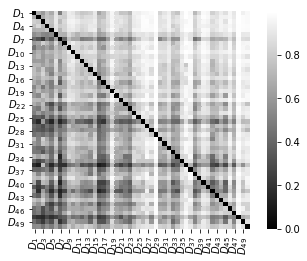

In [100]:
# Draw the heatmap with the mask
sns.heatmap(df, mask=None, square=True, cmap="gray")
plt.yticks(rotation=0) 
plt.savefig('heatmap2.pdf')